На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

Задания 
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
На каких платформах произошло больше всего релизов?
Игры каких издателей (Publisher) встречаются в датасете чаще всего?
В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?
Описание данных
Имеются следующие поля:

Rank – место по объему продаж
Name – название игры
Platform – платформа, на которой выпущена игра
Year – год релиза
Genre – жанр
Publisher – издатель
NA_Sales – продажи в Северной Америке, в млн.
EU_Sales – продажи в Европе, в млн.
JP_Sales – продажи в Японии, в млн.
Other_Sales – продажи в остальном мире, в млн.
Global_Sales – продажи по всему миру, в млн.

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
#Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, 
#размер, наличие пропущенных значений (если есть – удалить). 
#Также изучите типы переменных.

In [2]:
games = pd.read_csv('/home/jupyter-a.komova-13/STAT/games.csv')

In [3]:
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
games_corr = games.dropna()

In [10]:
games_corr

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
games['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [16]:
games.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [21]:
scipy.stats.mode(games.Year)

ModeResult(mode=array([2009.]), count=array([1431]))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


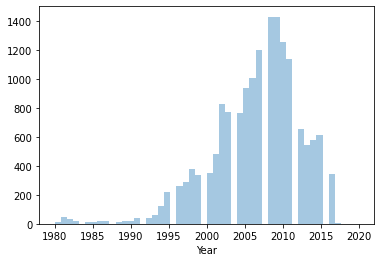

In [23]:
sns.distplot(games.Year, kde = False)

In [51]:
a = games_corr.groupby('Platform', as_index = False) \
.agg({'Name' : 'count'})

In [52]:
a

,Platform,Name
0,2600,116
1,3DO,3
2,3DS,499
3,DC,52
4,DS,2131
5,GB,97
6,GBA,786
7,GC,542
8,GEN,27
9,GG,1


In [53]:
a['platf_per'] = (a.Name / a.Name.sum()).mul(100)

In [54]:
a

,Platform,Name,platf_per
0,2600,116,0.712050
1,3DO,3,0.018415
2,3DS,499,3.063041
3,DC,52,0.319195
4,DS,2131,13.080842
5,GB,97,0.595421
6,GBA,786,4.824750
7,GC,542,3.326990
8,GEN,27,0.165736
9,GG,1,0.006138


In [55]:
a.platf_per.sum()

100.0

In [56]:
b = games_corr.Platform \
    .value_counts()

In [57]:
b

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [65]:
c = games_corr.Platform \
    .value_counts(normalize = True) \
    .mul(100)

In [66]:
c

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
WS       0.036830
SCD      0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: Platform, dtype: float64

In [ ]:
#'DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'

In [69]:
d = games_corr.Publisher \
    .value_counts()

In [70]:
d

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Enjoy Gaming ltd.                  1
Sony Music Entertainment           1
Sold Out                           1
Epic Games                         1
Ertain                             1
Name: Publisher, Length: 576, dtype: int64

In [ ]:
#Сфокусируемся на играх от Nintendo. 
#Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя 
#в разных регионах (NA, EU, JP, Other). 

#В каком регионе медианное значение объема продаж является наибольшим?

#Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [71]:
nintendo = games_corr.query('Publisher == "Nintendo"')

In [72]:
nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [84]:
nintendo.NA_Sales.describe(include = 'all')

count    696.000000
mean       1.172055
std        2.989913
min        0.000000
25%        0.010000
50%        0.375000
75%        0.972500
max       41.490000
Name: NA_Sales, dtype: float64

In [85]:
nintendo.EU_Sales.describe(include = 'all')

count    696.000000
mean       0.601006
std        1.743953
min        0.000000
25%        0.007500
50%        0.120000
75%        0.482500
max       29.020000
Name: EU_Sales, dtype: float64

In [86]:
nintendo.JP_Sales.describe(include = 'all')

count    696.000000
mean       0.653721
std        1.063110
min        0.000000
25%        0.090000
50%        0.280000
75%        0.740000
max       10.220000
Name: JP_Sales, dtype: float64

In [83]:
nintendo.Other_Sales.describe(include = 'all')

count    696.000000
mean       0.136767
std        0.464170
min        0.000000
25%        0.000000
50%        0.030000
75%        0.090000
max        8.460000
Name: Other_Sales, dtype: float64

In [82]:
nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


In [ ]:
#Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

#по оси x будет расположен жанр игры (Genre)
#по оси у – объем продаж в Японии (JP_sales)

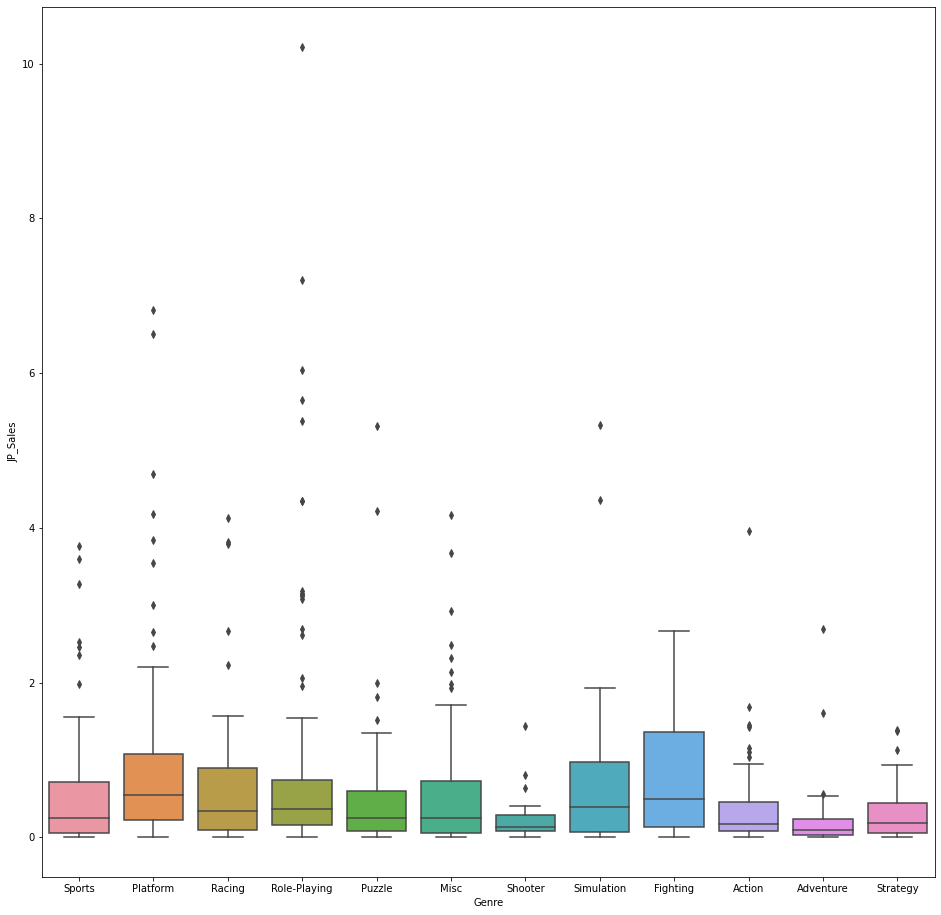

In [109]:
plt.figure(figsize=[16,16])

sns.boxplot(data = nintendo, x = 'Genre', y = 'JP_Sales')

In [ ]:
#Визуализируйте динамику изменения объема мировых продаж (Global_Sales) 
#по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

#На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? 
#Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.



In [110]:
nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [111]:
nintendo.query("Year in ('1998', '1999', '2000', '2001', '2002', '2003')")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
94,95,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
107,108,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07
...,...,...,...,...,...,...,...,...,...,...,...
9050,9052,Doshin the Giant,GC,2002.0,Simulation,Nintendo,0.00,0.00,0.14,0.00,0.14
9479,9481,Sin and Punishment,N64,2000.0,Shooter,Nintendo,0.00,0.00,0.13,0.00,0.13
10469,10471,Mickey's Speedway USA (weekly JP sales),N64,2000.0,Racing,Nintendo,0.00,0.00,0.10,0.00,0.10
10629,10631,L'Aigle de Guerre,GBA,2001.0,Strategy,Nintendo,0.00,0.00,0.10,0.00,0.10


In [121]:
n = nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
    .groupby(['Genre','Year']) \
    .Global_Sales.sum() \
    .reset_index()

In [122]:
n

,Genre,Year,Global_Sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55
...,...,...,...
109,Sports,2010.0,2.18
110,Sports,2012.0,1.05
111,Sports,2013.0,1.69
112,Sports,2014.0,0.88


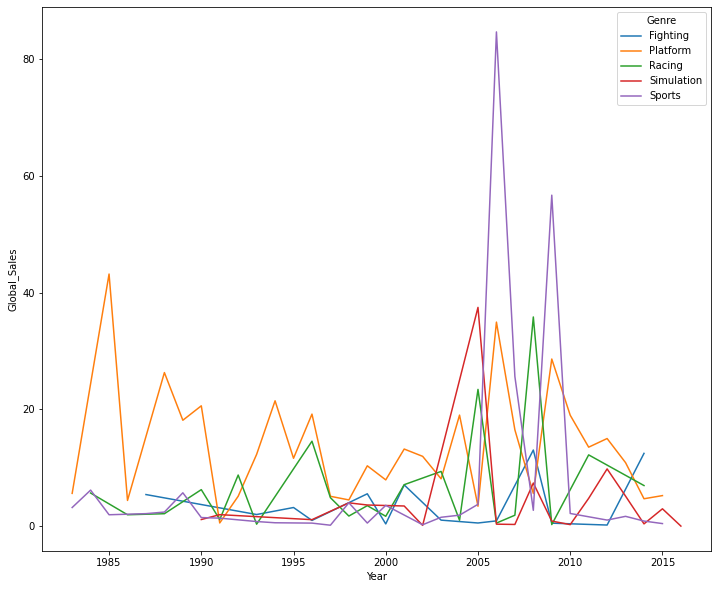

In [127]:
plt.figure(figsize=[12,10])
sns.lineplot(data = n, x = 'Year', y = 'Global_Sales', hue = 'Genre')